# What is Bayesian Dynamic Linear Modelling?

Bayesian Dynamic Linear Modelling is a means of modelling a time series that shows a significant change in state.

The Bayesian Dynamic Linear Model can be designed to adapt to changes in a system quickly - it does this by introducing a random component into the forecasts that can account for sharp structural changes in a time series.

### pydlm

The package used to implement the Bayesian Dynamic Linear Model is the PyDLM package.

The associated code examples and documentation for this package can be found below:

- [GitHub Repository: wwrechard/pydlm](https://github.com/wwrechard/PyDLM)
- [pydlm.github.io](https://pydlm.github.io/)

The [**Google data science post example**](https://pydlm.github.io/example1.html) as provided by the PyDLM documentation was used as a template in building the below models.

Here are some relevant technical terms describing the parameters in the models below:

- **degree** = Autoregressive component, i.e. how many previous time periods to incorporate into future forecasts.


- **discounting factor** = The speed at which the model should adapt to the new data.


- **seasonality period** = Seasonal period of the time series, e.g. hourly, daily, weekly, monthly.


- **w** = prior covariance

#### Attributions

The below examples use the pydlm package which is provided by the original author Xiangyu Wang (Copyright (c) 2017), provided under the BSD 3-Clause License. Modifications have been made where appropriate for conducting analysis on the dataset specific to this example. The below work and findings are not endorsed by the original author in any way.

The copyright and permission notices are included below:
    
Copyright (c) 2017, Xiangyu Wang (wwrechard@gmail.com)
All rights reserved.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL COPYRIGHT HOLDER BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

The original datasets for hotel cancellations, as well as relevant research, is available here from the original authors.

* [Antonio, Almeida, Nunes, 2019. Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

### Import Libraries and Data

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
import random
from math import sqrt

import statsmodels as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data=pd.read_csv("h2weekly.csv")
IsCanceled=data['IsCanceled']

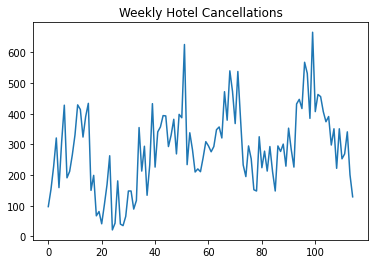

In [3]:
plt.plot(IsCanceled)
plt.title("Weekly Hotel Cancellations")
plt.show()

In [4]:
type(IsCanceled)

pandas.core.series.Series

In [5]:
time_series=np.array(IsCanceled)
time_series

array([ 97, 153, 228, 321, 159, 308, 428, 191, 212, 266, 331, 429, 414,
       324, 391, 434, 150, 199,  67,  81,  41, 103, 169, 263,  21,  43,
       181,  40,  35,  65, 148, 148,  89, 117, 355, 213, 294, 134, 233,
       433, 226, 341, 357, 394, 393, 293, 330, 382, 269, 398, 387, 626,
       234, 338, 283, 210, 220, 211, 257, 309, 295, 276, 293, 348, 357,
       321, 472, 379, 540, 473, 368, 538, 384, 233, 195, 295, 253, 152,
       148, 325, 224, 278, 213, 293, 211, 148, 295, 277, 301, 229, 353,
       283, 226, 432, 447, 417, 568, 532, 385, 666, 407, 463, 456, 407,
       374, 391, 298, 351, 222, 351, 253, 269, 341, 201, 129])

In [6]:
len(time_series)

115

### Autocorrelation and Partial Autocorrelation Plots

In this particular example, it is observed that the strongest positive correlation after the series of negatively correlated lags comes at lag 28. In this regard, **28** is set as the seasonal parameter when generating the simple and dynamic linear models.

In [7]:
acf(time_series, nlags=100)

/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  5.92888954e-01,  5.48850205e-01,  5.37000712e-01,
        4.31682822e-01,  3.25961139e-01,  2.17584692e-01,  1.92590932e-01,
        2.17882282e-01,  8.76673637e-02, -6.57767423e-03, -4.37376375e-02,
       -5.35017367e-02, -1.07476228e-01, -2.38858036e-01, -1.33530318e-01,
       -1.19857607e-01, -8.15091354e-02, -1.29787212e-01, -1.02581967e-01,
       -3.72644614e-02, -7.80160550e-02, -8.68811589e-02, -9.56165589e-02,
        3.17330180e-02,  5.81209235e-02,  7.98602439e-04,  7.07480396e-02,
        2.12908026e-01,  1.31543365e-01,  1.40459741e-01,  5.41431532e-02,
        9.36674861e-02,  7.35118941e-02, -1.65770420e-02, -1.55873812e-02,
        5.79842884e-02,  3.08998448e-02, -7.91610715e-02, -1.13521728e-01,
       -8.99399166e-02, -1.42665885e-01, -1.98968447e-01, -1.69370651e-01,
       -1.43395429e-01, -4.19013527e-02, -6.98633908e-02, -8.33128327e-02,
        2.12559282e-02,  5.84639607e-03, -6.12823731e-04,  1.23748147e-02,
        1.17913156e-01,  

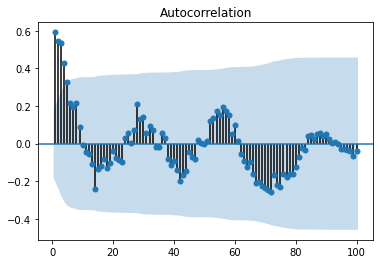

In [8]:
plot_acf(time_series, lags=100, zero=False);

In [9]:
pacf(time_series, nlags=100)

/home/michael/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.00000000e+00,  5.98089735e-01,  3.12714589e-01,  2.32537726e-01,
        5.92632736e-04, -1.09933975e-01, -1.67666843e-01, -3.69099953e-04,
        1.85228798e-01, -8.08323855e-02, -2.09016331e-01, -1.75795670e-01,
        2.52595193e-02,  7.08978524e-02, -1.81057918e-01,  1.19230690e-01,
        6.17113635e-02,  2.10950985e-01, -8.59909491e-02, -1.04198566e-01,
       -1.53929243e-02, -2.88803600e-02,  9.54292050e-02, -1.56298142e-01,
        2.04974346e-01,  9.97655564e-02, -5.55447504e-02,  3.81287988e-03,
        2.65424263e-01,  1.21126660e-02, -6.45248686e-02, -3.47808853e-01,
       -1.88535317e-01,  6.25588835e-02,  7.28708912e-02, -3.09894369e-02,
        1.31294136e-01,  6.13878052e-02, -1.71383033e-01, -2.71885431e-01,
       -2.82290579e-02,  5.03361355e-02,  1.58367939e-01,  1.01192203e-01,
       -5.72198551e-02,  2.22693043e-01,  1.83020886e-01, -2.27374443e-01,
        2.31925169e-02,  4.01134604e-02,  2.56214562e-01,  1.35157485e-01,
        8.99139009e-02, -

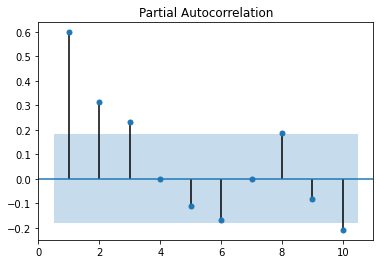

In [10]:
plot_pacf(time_series, lags=10, zero=False);

# Milestone 1

### Bayesian Model without dynamic or automatic components

#### Choice of parameters and definitions

In the first instance, the data is modelled using just the linear and seasonal components.

- **Linear trend model:** fits the data into a "line of best fit".


- **Seasonal factor (set to 28)**: Seasonal patterns in the data are observed every 28 weeks. Refer to the autocorrelation plot above, and you will see that the peak lag of 28 is the strongest positive correlation after the series of negatively correlated lags.


- **Latent variables:** Variables that are not directly observed, but inferred from other directly observed variables.


- **Prior distribution:** Represents one's prior beliefs about a distribution before directly observing any data.


- **Posterior distribution:** Combines the prior distribution and the likelihood function (the latter representing the new evidence contained in the observed data).

#### Why is the choice of discounting factor important in influencing the latent state of the posterior distribution?

- As explained in the [documentation example](https://pydlm.github.io/discounting.html), the discounting factor is the amount of data that is passed to the subsequent time series observation. For instance, suppose we observe a variable at time t. Given a discounting factor of 0.9, 90% of the data will be passed through to the observation at t+1, meaning that the new data will account for 10% of the overall performance of the time series.


- Thus, the lower the discounting factor, the more "adaptable" the model is. However, there is a tradeoff between not making the model adaptable enough, and discarding too much data. Given a maximum discounting factor of 0.99 and a minimum of 0.8, a discounting factor of **0.9** was selected here, in the interests of making the model flexible while also trying to prevent excessive data loss.


Try experimenting with different discounting factors. When selecting a lower or higher discounting factor, what changes do you observe in the forecasts?

#### Covariance matrix and prior covariance

- Covariance: Describes the degree of variability between two random variables.

- Covariance matrix: Describes the degree of variability among an array of random variables.

The model seeks to estimate an updated error covariance in conjunction with the updated state. Calculating this is necessary for the model to learn errors in estimation and factor this into the posterior distribution. **w** (or the prior covariance) represents the prior estimate of the trend component variance. The posterior covariance is then updated based on the new data. The larger the size of w, the more uncertain we are about the variance of each component.

Assuming that the prior is highly uncertain in this scenario, w was set to **10** (the same setting as used in the [Google data science post example](https://pydlm.github.io/example1.html).

However, feel free to experiment with different settings for w: how do your forecasts change when selecting a lower or higher setting?

In [11]:
from pydlm import dlm, trend, seasonality

linear_trend = trend(degree=1, discount=0.9, name='linear_trend', w=10)
seasonal28 = seasonality(period=28, discount=0.9, name='seasonal28', w=10)
simple_dlm = dlm(time_series) + linear_trend + seasonal28

In [12]:
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


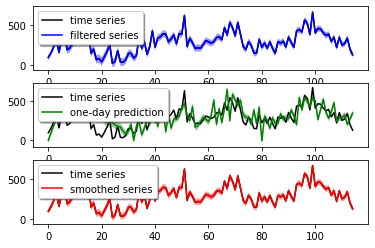

In [13]:
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [14]:
simple_dlm
simple_dlm.ls()

The static components are
linear_trend (degree = 2)
seasonal28 (degree = 28)
 
There is no dynamic component.
 
There is no automatic component.


In [15]:
simple_dlm_mse=simple_dlm.getMSE()

In [16]:
sqrt(simple_dlm_mse)

124.28653141706431

The model is tuned using gradient descent, with the mean squared error as the loss function.

In [17]:
from pydlm import modelTuner
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(simple_dlm, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


Here is a plot of the linear and seasonal trends.

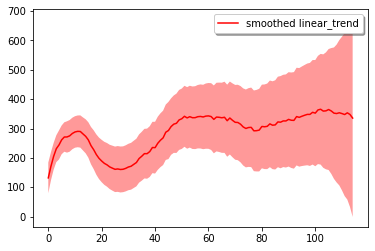

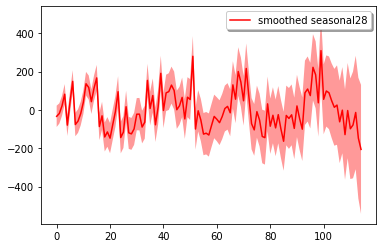

In [18]:
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal28')

### Forecast Interpretation

The below prediction plots show that while the forecast has shown some success in adapting to the structural shift, i.e. the downward shift in trend in the latter of the series - the confidence bands around the series are still quite wide. This implies uncertainty in the forecasts being constructed - we cannot be confident that the forecasts being made by the model would be accurate across different sets of data.

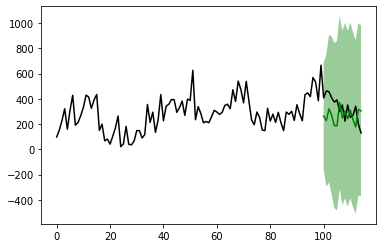

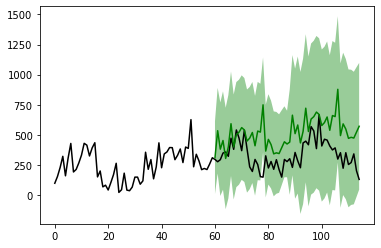

In [19]:
# Plotted prediction for the first 100 weeks, with a forecast generated for the following 15 weeks.
simple_dlm.plotPredictN(date=100, N=15)
# Plotted prediction for the first 60 weeks, with a forecast generated for the following 55 weeks.
simple_dlm.plotPredictN(date=60, N=55)

In [20]:
a=simple_dlm.predictN(date=100, N=15)
a

([263.3174737942917,
  227.05996523460766,
  319.9967061169414,
  270.2030540969283,
  187.4350235496223,
  186.60535616188514,
  370.65427324048744,
  248.24849416542736,
  305.145158229602,
  242.31288408960125,
  309.3447983450882,
  233.93910704440464,
  176.43960422814703,
  316.1330179615115,
  303.94095313501373],
 [46287.05767710939,
  70946.24378207633,
  88881.84543708569,
  101791.37597110425,
  110938.68686400702,
  117270.72701562673,
  121491.61429750659,
  124119.06391000653,
  125528.80368525829,
  125989.63861301668,
  125691.11468331837,
  124765.47786005415,
  123304.8839134684,
  121385.03980504509,
  119041.34384723988])

In [21]:
a=np.array(a)
a

array([[   263.31747379,    227.05996523,    319.99670612,
           270.2030541 ,    187.43502355,    186.60535616,
           370.65427324,    248.24849417,    305.14515823,
           242.31288409,    309.34479835,    233.93910704,
           176.43960423,    316.13301796,    303.94095314],
       [ 46287.05767711,  70946.24378208,  88881.84543709,
        101791.3759711 , 110938.68686401, 117270.72701563,
        121491.61429751, 124119.06391001, 125528.80368526,
        125989.63861302, 125691.11468332, 124765.47786005,
        123304.88391347, 121385.03980505, 119041.34384724]])

In [22]:
b=a[0:1]
b=b.reshape(-1)
b

array([263.31747379, 227.05996523, 319.99670612, 270.2030541 ,
       187.43502355, 186.60535616, 370.65427324, 248.24849417,
       305.14515823, 242.31288409, 309.34479835, 233.93910704,
       176.43960423, 316.13301796, 303.94095314])

In [23]:
test=np.array(IsCanceled[100:115])
test

array([407, 463, 456, 407, 374, 391, 298, 351, 222, 351, 253, 269, 341,
       201, 129])

In [24]:
np.mean(test)

327.53333333333336

### RMSE

An RMSE (root mean squared error) of 141 is yielded relative to the mean value of 327 across the test set. The size of the RMSE accounts for 43% of the mean value, indicating that the forecast accuracy needs some improvement.

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, b)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 141.424403


In [26]:
type(seasonal28)

pydlm.modeler.seasonality.seasonality

In [27]:
type(linear_trend)

pydlm.modeler.trends.trend